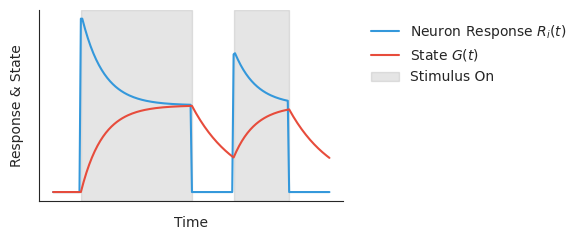

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
K = 5.0  # maximum attainable response
sigma = 1  # sensitivity to the feedback signal
alpha = 0.03  # rate of change for the feedback signal
n_timesteps = 200

# Input signal
L = np.zeros(n_timesteps)
L[20:100] = 1
L[130:170] = 1

# Initialize the response and state g
R = np.zeros(n_timesteps)
G = np.zeros(n_timesteps)

# Temporal divisive normalization calculation
for t in range(1, n_timesteps):
    G[t] = (1 - alpha) * G[t - 1] + alpha * R[t - 1]
    R[t] = (L[t] * (np.sqrt(K - G[t - 1]) / sigma))**2

palette = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#9b59b6"]

# Plotting
plt.figure(figsize=(6, 2.5))
plt.plot(R, label='Neuron Response $R_i(t)$', color=palette[0])
plt.plot(G, label='State $G(t)$', color=palette[1])
plt.xlabel('Time')
plt.ylabel('Response & State')
plt.axvspan(20, 100, color='grey', alpha=0.2, label='Stimulus On')
plt.axvspan(130, 170, color='grey', alpha=0.2)
plt.legend()
plt.grid(False)
# despine
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# disable axis ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])
# legend right
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('figures/intro_001.svg')
plt.savefig('figures/intro_001.pdf')
plt.savefig('figures/intro_001.png', dpi=300)


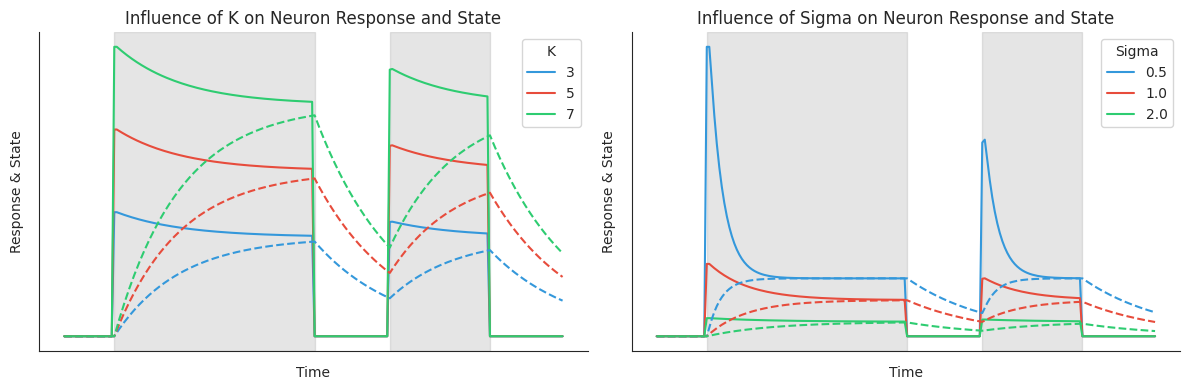

In [35]:
# Additional data storage for state G
data_K_G = []
data_sigma_G = []

# Simulation for different K values (including state G)
for K in K_values:
    R = np.zeros(n_timesteps)
    G = np.zeros(n_timesteps)
    for t in range(1, n_timesteps):
        G[t] = (1 - alpha) * G[t - 1] + alpha * R[t - 1]
        R[t] = (L[t] * (np.sqrt(K - G[t - 1]) / sigma))**2
    for t in range(n_timesteps):
        data_K_G.append({'Time': t, 'State': G[t], 'K': K})

# Simulation for different sigma values (including state G)
sigma = 1  # Resetting sigma to a constant value
for sigma in sigma_values:
    R = np.zeros(n_timesteps)
    G = np.zeros(n_timesteps)
    for t in range(1, n_timesteps):
        G[t] = (1 - alpha) * G[t - 1] + alpha * R[t - 1]
        R[t] = (L[t] * (np.sqrt(K - G[t - 1]) / sigma))**2
    for t in range(n_timesteps):
        data_sigma_G.append({'Time': t, 'State': G[t], 'Sigma': sigma})

# Convert to DataFrame
df_K_G = pd.DataFrame(data_K_G)
df_sigma_G = pd.DataFrame(data_sigma_G)

# Plotting with state G in dashed lines
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_style('white')
# Custom color palette
palette = ["#3498db", "#e74c3c", "#2ecc71"]

# Plot for K values (including state G)
sns.lineplot(data=df_K, x='Time', y='Response', hue='K', ax=axes[0], palette=palette, legend=True)
sns.lineplot(data=df_K_G, x='Time', y='State', hue='K', ax=axes[0], palette=palette, legend=False, linestyle='--')
axes[0].set_title('Influence of K on Neuron Response and State')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Response & State')
# No ticklabels
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])

# Plot for sigma values (including state G)
sns.lineplot(data=df_sigma, x='Time', y='Response', hue='Sigma', ax=axes[1], palette=palette, legend=True)
sns.lineplot(data=df_sigma_G, x='Time', y='State', hue='Sigma', ax=axes[1], palette=palette, legend=False, linestyle='--')
axes[1].set_title('Influence of Sigma on Neuron Response and State')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Response & State')
# No ticklabels
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])

# Grey box over stimulus
for ax in axes:
    ax.axvspan(20, 100, color='grey', alpha=0.2)
    ax.axvspan(130, 170, color='grey', alpha=0.2)

sns.despine()

plt.tight_layout()

plt.savefig('figures/intro_002.pdf')
plt.savefig('figures/intro_002.png', dpi=300)


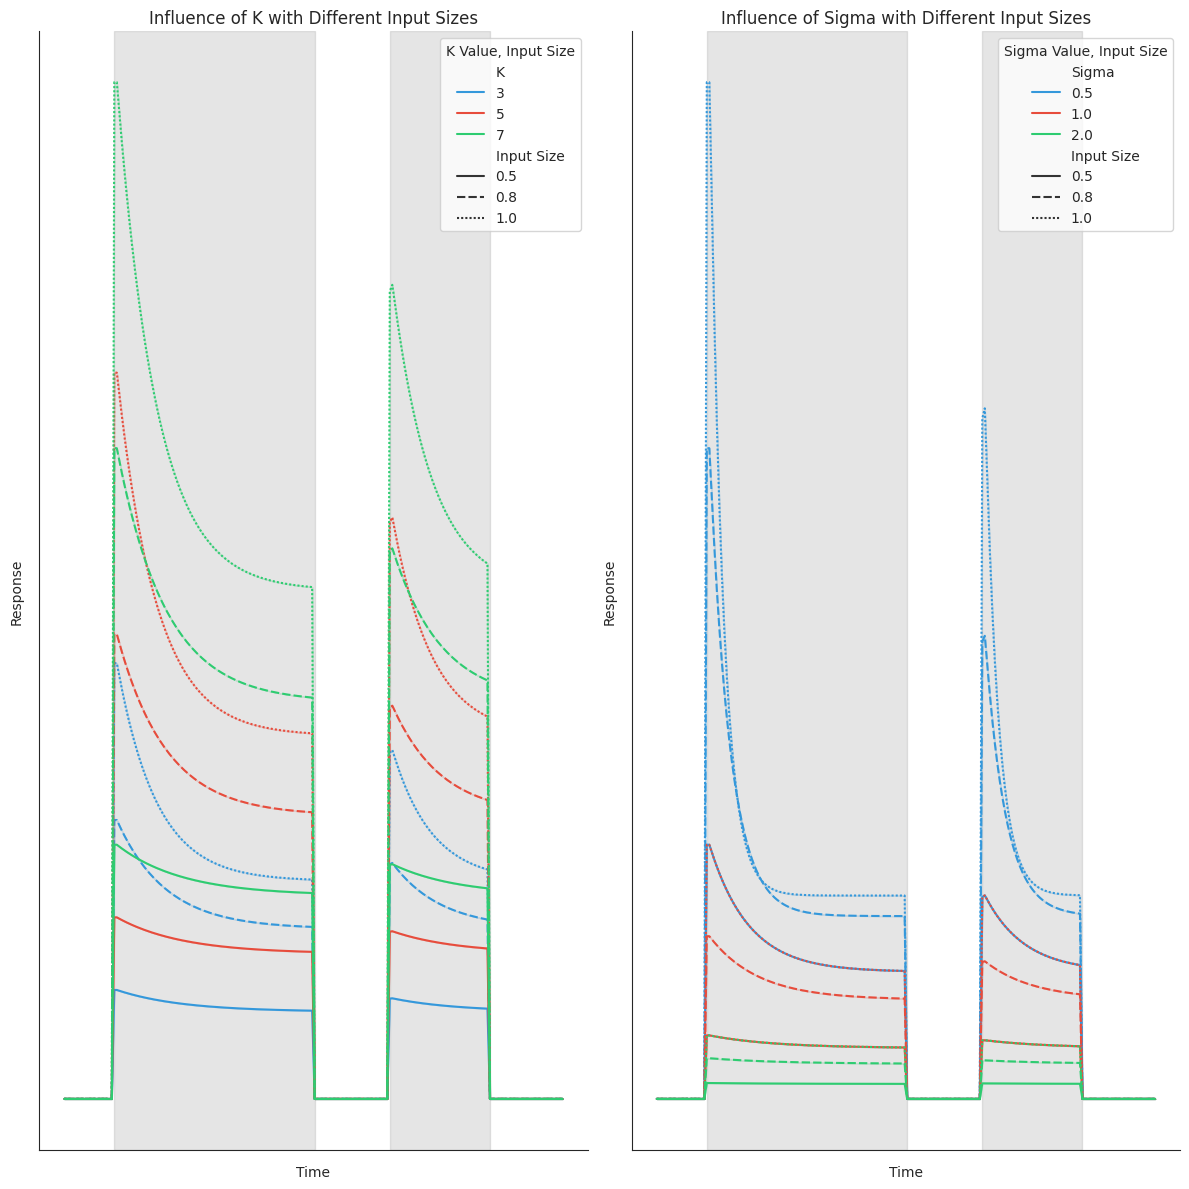

In [41]:
# Adjusting the simulation to include different input sizes
input_sizes = [0.5, 0.8, 1] * 3
data_K_input = []
data_sigma_input = []

# Constants for the simulation
K = 5.0
sigma = 1
n_timesteps = 200
alpha = 0.03

# Simulation for different input sizes and K values
for input_size in input_sizes:
    L = np.zeros(n_timesteps)
    L[20:100] = input_size
    L[130:170] = input_size
    for K in K_values:
        R = np.zeros(n_timesteps)
        G = np.zeros(n_timesteps)
        for t in range(1, n_timesteps):
            G[t] = (1 - alpha) * G[t - 1] + alpha * R[t - 1]
            R[t] = (L[t] * (np.sqrt(K - G[t - 1]) / sigma))**2
        for t in range(n_timesteps):
            data_K_input.append({'Time': t, 'Response': R[t], 'K': K, 'Input Size': input_size})

# Simulation for different input sizes and sigma values
for input_size in input_sizes:
    L = np.zeros(n_timesteps)
    L[20:100] = input_size
    L[130:170] = input_size
    for sigma in sigma_values:
        R = np.zeros(n_timesteps)
        G = np.zeros(n_timesteps)
        for t in range(1, n_timesteps):
            G[t] = (1 - alpha) * G[t - 1] + alpha * R[t - 1]
            R[t] = (L[t] * (np.sqrt(K - G[t - 1]) / sigma))**2
        for t in range(n_timesteps):
            data_sigma_input.append({'Time': t, 'Response': R[t], 'Sigma': sigma, 'Input Size': input_size})

# Convert to DataFrame
df_K_input = pd.DataFrame(data_K_input)
df_sigma_input = pd.DataFrame(data_sigma_input)

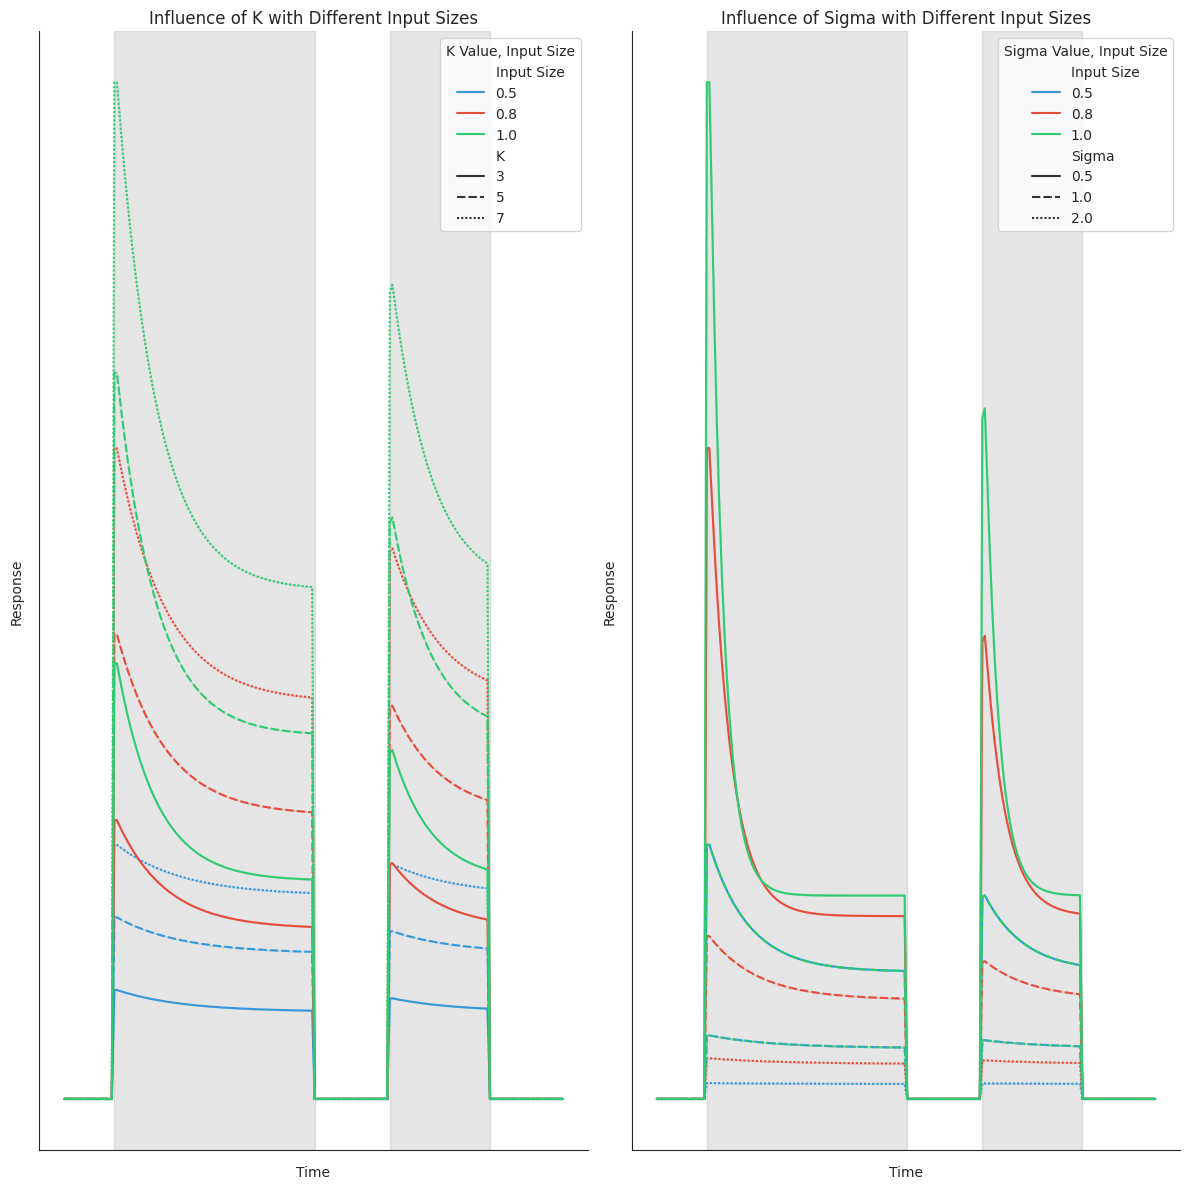

In [42]:
# Plotting with varying input sizes
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

sns.set_style('white')
palette = ["#3498db", "#e74c3c", "#2ecc71"]

# Plot for K values with varying input sizes
sns.lineplot(data=df_K_input, x='Time', y='Response', style='K', hue='Input Size', ax=axes[0], palette=palette)
axes[0].set_title('Influence of K with Different Input Sizes')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Response')
axes[0].legend(title='K Value, Input Size')
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[0].axvspan(20, 100, color='grey', alpha=0.2)
axes[0].axvspan(130, 170, color='grey', alpha=0.2)

# Plot for sigma values with varying input sizes
sns.lineplot(data=df_sigma_input, x='Time', y='Response', style='Sigma', hue='Input Size', ax=axes[1], palette=palette)
axes[1].set_title('Influence of Sigma with Different Input Sizes')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Response')
axes[1].legend(title='Sigma Value, Input Size')
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])
axes[1].axvspan(20, 100, color='grey', alpha=0.2)
axes[1].axvspan(130, 170, color='grey', alpha=0.2)

sns.despine()

plt.tight_layout()
plt.show()